In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import astropy_mpl_style

#match_fits=fits.open('2018-02-01-partial-MaNGA-MPA-rings.fits')
match_fits=fits.open('2018-02-01-partial-MaNGA-MPA-rings.fits')
#GZ_match_fits=fits.open('2018-01-24-match-with-GZ2.fits')
GZ_match_fits=fits.open('2018-02-01-partial-match-with-GZ2.fits')
gal_lines=fits.open('gal_line_dr7_v5_2.fit.gz')

In [19]:
step1=np.logical_and(GZ_match_fits[1].data['t01_smooth_or_features_a02_features_or_disk_debiased']>=0.430,GZ_match_fits[1].data['t02_edgeon_a05_no_debiased']>0.715)
#step2=GZ_match_fits[1].data['t03_bar_a06_bar_count']>10
step2=GZ_match_fits[1].data['t02_edgeon_a05_no_count']>10
step3=np.logical_and(step1,step2)
GZmask=step3
step4=np.logical_and(step3,GZ_match_fits[1].data['t03_bar_a06_bar_debiased']>0.6)
BARmask=step4
GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][BARmask].shape

(12,)

In [20]:
GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][GZmask].shape

(83,)

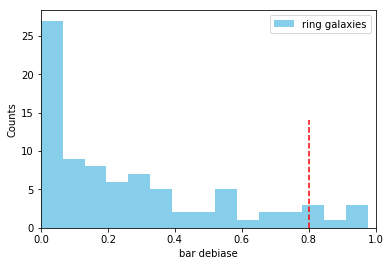

In [21]:
#ring galaxies have bars?
plt.hist(GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][GZmask],15,color='skyblue',alpha=1,label='ring galaxies')
#plt.hist(match_fits[1].data['t03_bar_a07_no_bar_debiased'],30,color='orange',alpha=0.5,label='no bar')
x=np.linspace(0.8,0.8,10)
y=np.linspace(0,14,10)
plt.plot(x,y,'--',color='red')
plt.xlabel('bar debiase')
plt.ylabel('Counts')
plt.xlim(0,1)
plt.legend()
plt.show()

In [100]:
Lsii_6717=match_fits[1].data['SII_6717_flux']
Lsii_6731=match_fits[1].data['SII_6731_flux']
Lsii=Lsii_6717+Lsii_6731
err_Lsii=match_fits[1].data['SII_6717_flux_err']*1.621
SN_sii_6717=Lsii_6717/err_Lsii
SN_sii_6731=Lsii_6731/err_Lsii

Lha=match_fits[1].data['H_alpha_flux']
err_Lha=match_fits[1].data['H_alpha_flux_err']*2.473
SN_ha=Lha/err_Lha

Lhb=match_fits[1].data['H_beta_flux']
err_Lhb=match_fits[1].data['H_beta_flux_err']*1.882
SN_hb=Lhb/err_Lhb

Loiii=match_fits[1].data['OIII_5007_flux']
err_Loiii=match_fits[1].data['OIII_5007_flux_err']*1.566
SN_oiii=Loiii/err_Loiii

Lnii=match_fits[1].data['NII_6584_flux']
err_Lnii=match_fits[1].data['NII_6584_flux_err']*2.039
SN_nii=Lnii/err_Lnii

log_SFR=match_fits[1].data['log_SFR_1']

b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii_6717>b,SN_sii_6731>b),SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

In [49]:
#Lsii=gal_lines[1].data['SII_6717_flux']
#Lha=gal_lines[1].data['H_alpha_flux']
#Lhb=gal_lines[1].data['H_beta_flux']
#Loiii=gal_lines[1].data['OIII_5007_flux']
#Lnii=gal_lines[1].data['NII_6584_flux']
#log_SFR=match_fits[1].data['log_SFR']

In [101]:
############BPT DIAGRAM FOR CORE RING GALAXIES################
fig=plt.figure(figsize=(18,7))
ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=match_fits[1].data['t03_bar_a06_bar_debiased'][SNmask], s=15, marker='o', cmap='binary')#np.log10(core_Lnii/ring_Lha)
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'k--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.6)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'Bar debiased')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][SNmask], s=15, marker='o', cmap='binary')#np.log10(core_Lnii/ring_Lha)
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'k--',alpha=0.5)

x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
plt.plot(x,y2,'k--',alpha=0.5)
#plt.gray()
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
#plt.colorbar(label=r'Median S/N')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


KeyError: "Key 't03_bar_a06_bar_debiased' does not exist."

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


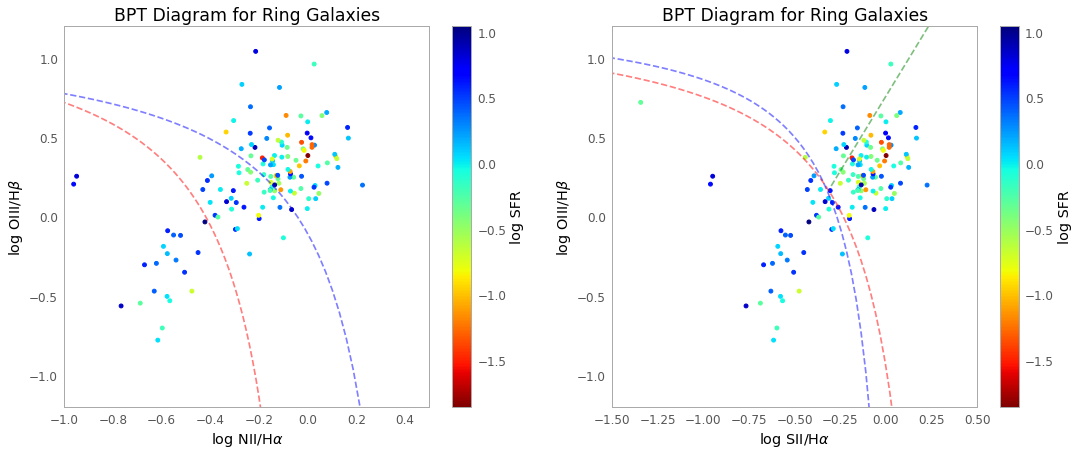

In [136]:
############BPT DIAGRAM FOR CORE RING GALAXIES################
fig=plt.figure(figsize=(18,7))
ax1 = plt.subplot2grid((1,2), (0,0))
#plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=log_SFR[SNmask], s=15, marker='o', cmap='jet_r')
plt.scatter(np.log10(Lsii/Lha),np.log10(Loiii/Lhb),c=log_SFR, s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
#plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=log_SFR[SNmask], s=15, marker='o', cmap='jet_r')
plt.scatter(np.log10(Lsii/Lha),np.log10(Loiii/Lhb),c=log_SFR, s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)

x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'r--',alpha=0.5)
plt.plot(x,y3,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log SFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

In [138]:
############BPT DIAGRAM FOR CORE RING GALAXIES################
fig=plt.figure(figsize=(18,7))
ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=match_fits[1].data['SSFR-AVG'][SNmask], s=15, marker='o', cmap='Blues')#np.log10(core_Lnii/ring_Lha)
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log sSFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=match_fits[1].data['SSFR-AVG'][SNmask], s=15, marker='o', cmap='Blues')#np.log10(core_Lnii/ring_Lha)
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)

x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'r--',alpha=0.5)
plt.plot(x,y3,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log sSFR')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
plt.title(r'BPT Diagram for Ring Galaxies')

#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


ValueError: field 'log_sersic_mass' occurs more than once

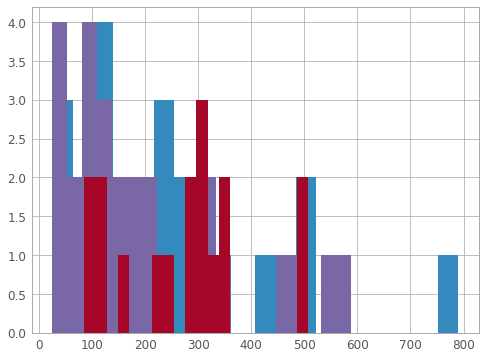

In [108]:
AGN_ring_Lha=match_fits[1].data['ring_Lha_1'][np.logical_or(match_fits[1].data['SUBCLASS']=='AGN',match_fits[1].data['SUBCLASS']=='AGN BROADLINE' )]
BL_ring_Lha=match_fits[1].data['ring_Lha_1'][match_fits[1].data['SUBCLASS']=='BROADLINE']
SF_ring_Lha=match_fits[1].data['ring_Lha_1'][match_fits[1].data['SUBCLASS']=='STARFORMING']
plt.hist(AGN_ring_Lha,20)
plt.hist(BL_ring_Lha,20)
plt.hist(SF_ring_Lha,20)
plt.show()

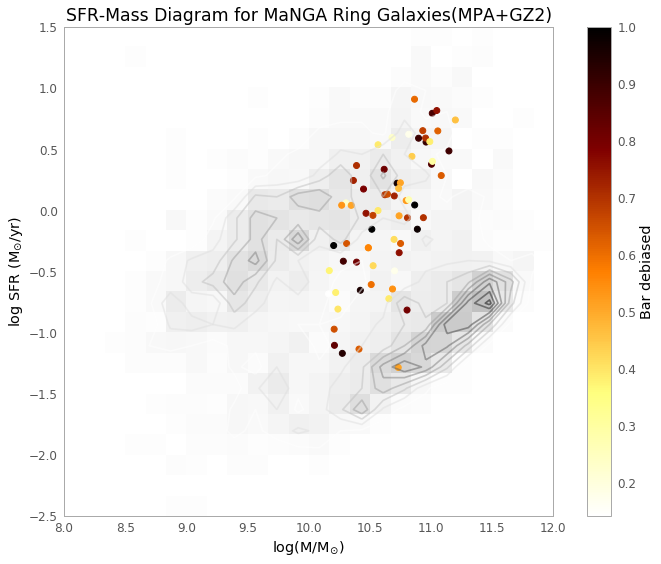

In [132]:
########################部分MANGA星系的SFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
tot_log_SFR=manga_mpa[1].data['SFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SFR=tot_log_SFR.tolist()
bins_for_SFR=np.linspace(-2.5,1.5,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T
fig=plt.figure(figsize=(12,9))
plt.style.use(astropy_mpl_style)

plt.scatter(GZ_match_fits[1].data['log_sersic_mass_1'][GZmask] ,GZ_match_fits[1].data['log_SFR_1'][GZmask],c=GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][GZmask], marker='o', cmap='afmhot_r')
plt.colorbar(label='Bar debiased')

#plt.scatter(GZ_match_fits[1].data['log_sersic_mass'][GZmask!=True] ,GZ_match_fits[1].data['log_SFR'][GZmask!=True],c=GZ_match_fits[1].data['t03_bar_a06_bar_debiased'][GZmask!=True], marker='o', cmap='Blues')
#plt.colorbar(label='Bar debiased')

plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for MaNGA Ring Galaxies(MPA+GZ2)')
#plt.savefig('tot.galaxy.fits')
plt.show()

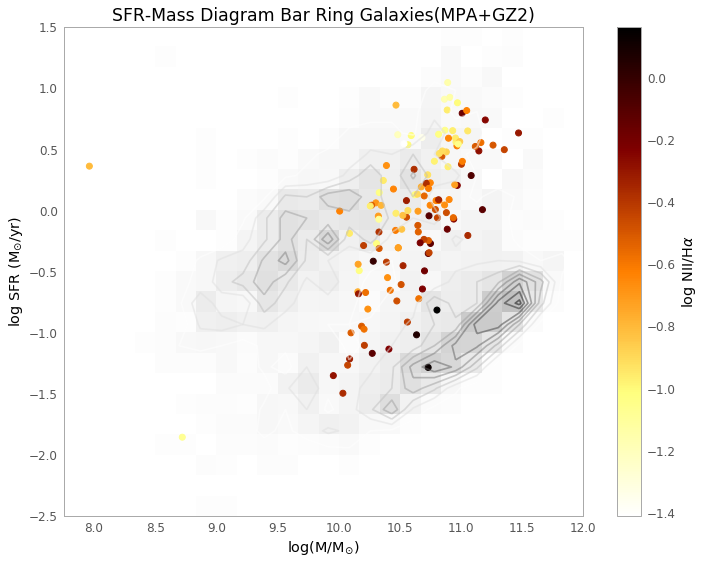

In [131]:
########################部分MANGA星系的SFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
tot_log_SFR=manga_mpa[1].data['SFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SFR=tot_log_SFR.tolist()
bins_for_SFR=np.linspace(-2.5,1.5,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T

plt.scatter(GZ_match_fits[1].data['log_sersic_mass_1'] ,GZ_match_fits[1].data['log_SFR_1'],c=np.log10(GZ_match_fits[1].data['core_Lnii_1']/GZ_match_fits[1].data['ring_Lha_1']), marker='o', cmap='afmhot_r')
plt.colorbar(label=r'$\log$ NII/H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram Bar Ring Galaxies(MPA+GZ2)')
plt.show()

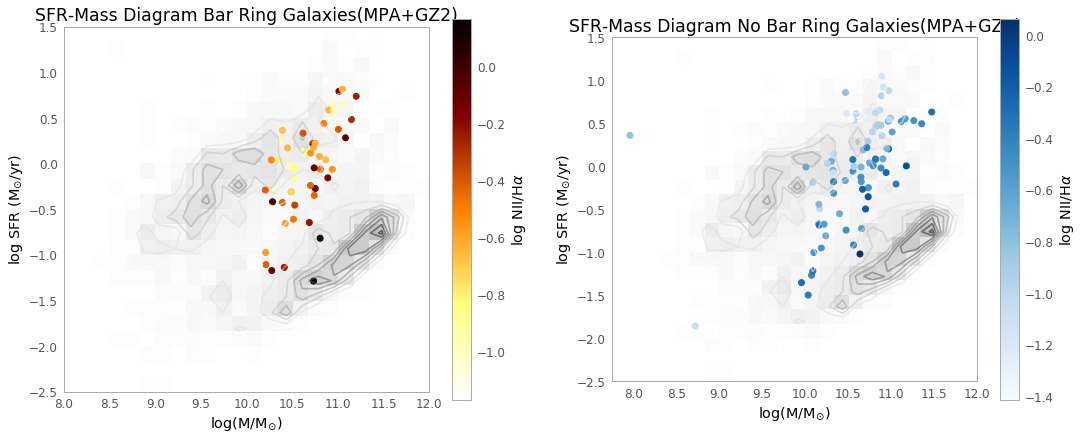

In [135]:
########################部分MANGA星系的SFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
tot_log_SFR=manga_mpa[1].data['SFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SFR=tot_log_SFR.tolist()
bins_for_SFR=np.linspace(-2.5,1.5,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T

ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(GZ_match_fits[1].data['log_sersic_mass_1'][BARmask] ,GZ_match_fits[1].data['log_SFR_1'][BARmask],c=np.log10(GZ_match_fits[1].data['core_Lnii_1']/GZ_match_fits[1].data['ring_Lha_1'])[BARmask], marker='o', cmap='afmhot_r')
plt.colorbar(label=r'$\log$ NII/H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram Bar Ring Galaxies(MPA+GZ2)')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(GZ_match_fits[1].data['log_sersic_mass_1'][BARmask!=True] ,GZ_match_fits[1].data['log_SFR_1'][BARmask!=True], c=np.log10(GZ_match_fits[1].data['core_Lnii_1']/GZ_match_fits[1].data['ring_Lha_1'])[BARmask!=True], marker='o', cmap='Blues')
plt.colorbar(label=r'$\log$ NII/H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram No Bar Ring Galaxies(MPA+GZ2)')

plt.show()

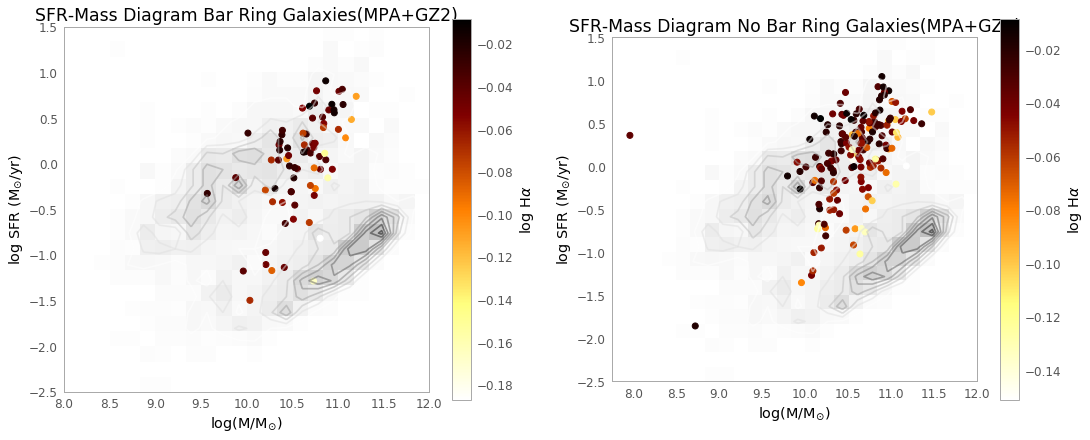

In [87]:
########################部分MANGA星系的SFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
tot_log_SFR=manga_mpa[1].data['SFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SFR=tot_log_SFR.tolist()
bins_for_SFR=np.linspace(-2.5,1.5,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T

ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(GZ_match_fits[1].data['log_sersic_mass'][BARmask] ,GZ_match_fits[1].data['log_SFR'][BARmask],c=np.log10(GZ_match_fits[1].data['ring_Lha']/GZ_match_fits[1].data['Lha'])[BARmask], marker='o', cmap='afmhot_r')
plt.colorbar(label=r'$\log$ H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram Bar Ring Galaxies(MPA+GZ2)')

ax2=plt.subplot2grid((1,2),(0,1))
plt.scatter(GZ_match_fits[1].data['log_sersic_mass'][BARmask!=True] ,GZ_match_fits[1].data['log_SFR'][BARmask!=True], c=np.log10(GZ_match_fits[1].data['ring_Lha']/GZ_match_fits[1].data['Lha'])[BARmask!=True], marker='o', cmap='afmhot_r')
plt.colorbar(label=r'$\log$ H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram No Bar Ring Galaxies(MPA+GZ2)')

plt.show()

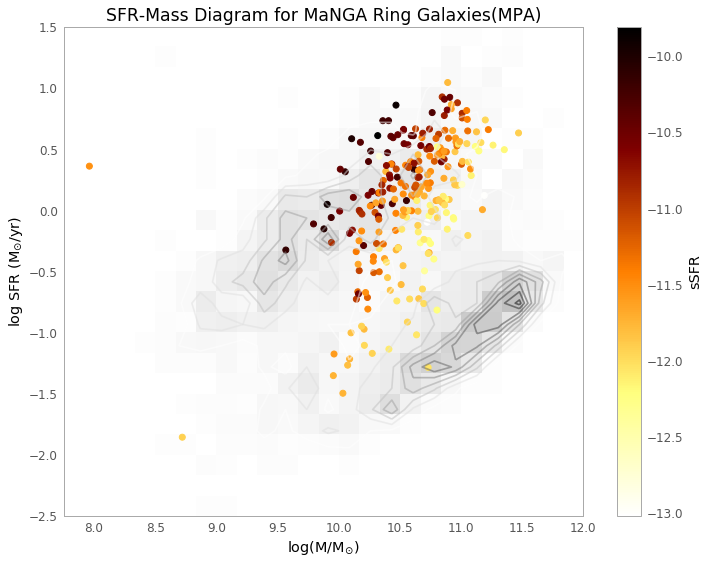

In [50]:
########################部分MANGA星系的SFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
tot_log_SFR=manga_mpa[1].data['SFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SFR=tot_log_SFR.tolist()
bins_for_SFR=np.linspace(-2.5,1.5,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H=H.T
fig=plt.figure(figsize=(12,9))
plt.style.use(astropy_mpl_style)

plt.scatter(match_fits[1].data['log_sersic_mass'],match_fits[1].data['log_SFR'],c=match_fits[1].data['SSFR-AVG'], marker='o', cmap='afmhot_r')
plt.colorbar(label='sSFR')

plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
#plt.imshow(H_ring, interpolation='nearest',origin='low', cmap='hot_r', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
#plt.colorbar(label='Counts')


plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for MaNGA Ring Galaxies(MPA)')
#plt.savefig('tot.galaxy.fits')
plt.show()

In [7]:
manga_mpa[1].data['SSFR-AVG']

array([-10.74601936, -10.47177029,  -9.07749939, ..., -12.16691017,
        -9.58623981, -12.00430012], dtype=float32)

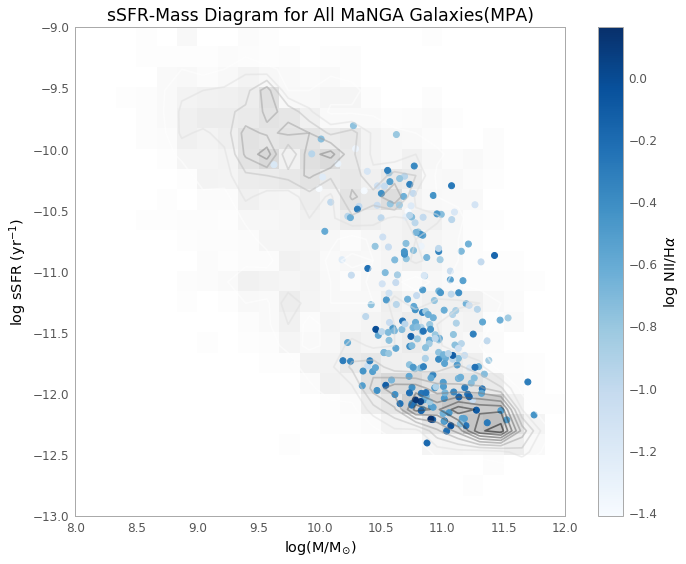

In [82]:
########################部分MANGA星系的sSFR-MASS图#########################
manga_mpa=fits.open('2018-01-30-MaNGA-MPA.fits')
ring_mpa=fits.open('2018-01-30-MaNGA-MPA-rings.fits')

ring_log_SSFR=ring_mpa[1].data['SSFR-AVG']
ring_log_mass=ring_mpa[1].data['MASS-AVG']
mask=(ring_log_mass!=-1)

tot_log_SSFR=manga_mpa[1].data['SSFR-AVG']
tot_log_mass=manga_mpa[1].data['MASS-AVG']
tot_log_mass=tot_log_mass.tolist()
tot_log_SSFR=tot_log_SSFR.tolist()

bins_for_SSFR=np.linspace(-13,-9,25)
bins_for_mass=np.linspace(8,12,25)
H, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass,tot_log_SSFR, bins=(bins_for_mass, bins_for_SSFR))
H=H.T
fig=plt.figure(figsize=(12,9))
plt.style.use(astropy_mpl_style)


plt.scatter(ring_log_mass[mask], ring_log_SSFR[mask], c=np.log10(ring_mpa[1].data['core_Lnii']/ring_mpa[1].data['ring_Lha'])[mask], marker='o', cmap='Blues')
plt.colorbar(label=r'$\log$ NII/H$\alpha$')
plt.imshow(H, interpolation='nearest',origin='low', cmap='binary',alpha=0.25, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.contour(H,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='binary', alpha=0.5)
#plt.imshow(H_ring, interpolation='nearest',origin='low', cmap='hot_r', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
#plt.colorbar(label='Counts')


plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for All MaNGA Galaxies(MPA)')
#plt.savefig('tot.galaxy.fits')
plt.show()

In [82]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,